**Болатаева Дарья**

Рассмотрим датасет с ценами на жильё в Москве за 2011-2015 год, данные предоставлены [Сбербанком](https://www.kaggle.com/c/sberbank-russian-housing-market/data).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('sberbank_moscow.csv', sep = ',')

In [4]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [5]:
# посчитаем, сколько в данных пропусков (суммарно)
df.isnull().sum().sum()

261026

In [6]:
# посчитаем долю от общего количества значений
df.isnull().sum().sum() / df.size 

0.029336899265998705

*В данных всего 261.026 пропусков. Их доля от общего количества значений (ячеек таблицы) составляет 0.0293 (2.93%).*

Про некоторые признаки данных не очень много, так что выберем колонки, смысл которых мы заведомо будем понимать. 

In [7]:
target_column = 'price_doc'

In [8]:
nominal_feature_columns = [
    'sub_area',
    'ecology',
]

In [9]:
df[nominal_feature_columns].isnull().sum()

sub_area    0
ecology     0
dtype: int64

In [10]:
internal_feature_columns = [
    'full_sq',
    'floor',
]

In [11]:
df[internal_feature_columns].isnull().sum()

full_sq      0
floor      167
dtype: int64

In [12]:
school_feature_columns = [
    'children_preschool',
    'children_school',
    'school_education_centers_top_20_raion',
    'university_top_20_raion',
    'additional_education_km',
    'university_km',
]

In [13]:
df[school_feature_columns].isnull().sum()

children_preschool                       0
children_school                          0
school_education_centers_top_20_raion    0
university_top_20_raion                  0
additional_education_km                  0
university_km                            0
dtype: int64

In [14]:
infrastructure_feature_columns = [
    'nuclear_reactor_km',
    'power_transmission_line_km',
    'public_transport_station_km',
    'public_transport_station_min_walk',
    'mkad_km',
    'kremlin_km',
]

In [15]:
df[infrastructure_feature_columns].isnull().sum()

nuclear_reactor_km                   0
power_transmission_line_km           0
public_transport_station_km          0
public_transport_station_min_walk    0
mkad_km                              0
kremlin_km                           0
dtype: int64

Посмотрели на колонки и пропуски в них, теперь объединим всё в один список и будем использовать в качестве признаков только перечисленные столбцы:

In [16]:
feature_columns = nominal_feature_columns + internal_feature_columns + school_feature_columns + infrastructure_feature_columns + [target_column]

Сохраним таблицу только с перечисленными колонками и удалим из неё все строки с пропусками:

In [17]:
# сохраняем таблицу (dff) только с колонками из списка ``feature_columns``
dff = df[feature_columns]

In [18]:
# удалим пропуски
dff = dff.dropna()

In [19]:
dff.shape

(30304, 17)

*В новой таблице осталось 17 колонок и 30.304 строки после удаления пропусков.*

In [20]:
dff.head()

,sub_area,ecology,full_sq,floor,children_preschool,children_school,school_education_centers_top_20_raion,university_top_20_raion,additional_education_km,university_km,nuclear_reactor_km,power_transmission_line_km,public_transport_station_km,public_transport_station_min_walk,mkad_km,kremlin_km,price_doc
0,Bibirevo,good,43,4.0,9576,10309,0,0,0.947962,6.715026,5.718519,1.062513,0.274985,3.299822,1.422391,15.156211,5850000
1,Nagatinskij Zaton,excellent,34,3.0,6880,7759,0,0,1.072315,1.852560,3.489954,1.246149,0.065263,0.783160,9.503405,8.698054,6000000
2,Tekstil'shhiki,poor,43,2.0,5879,6207,0,0,0.391957,0.841254,7.506612,1.602183,0.328756,3.945073,5.604800,9.067885,5700000
3,Mitino,good,89,9.0,13087,13670,0,0,0.892674,10.903161,9.522538,1.767612,0.131597,1.579164,2.677824,19.487005,13100000
4,Basmannoe,excellent,77,4.0,5706,6748,0,2,0.810801,0.991683,8.671016,3.632640,0.071480,0.857764,11.616653,2.578671,16331452


Посмотрим на районы:

In [26]:
dff['sub_area'].unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Fili Davydkovo', 'Otradnoe',
       'Novo-Peredelkino', 'Bogorodskoe', 'Jaroslavskoe', 'Strogino',
       'Hovrino', "Moskvorech'e-Saburovo", 'Staroe Krjukovo', 'Ljublino',
       'Caricyno', 'Veshnjaki', 'Danilovskoe', 'Preobrazhenskoe',
       "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino',
       'Donskoe', 'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino',
       'Izmajlovo', 'Severnoe Medvedkovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Babushkinskoe', 'Pokrovskoe Streshnevo', 'Obruc

In [27]:
# найдем минимальную цену квартир для района Орехово-Борисово Южное 
dff[dff['sub_area'] == 'Orehovo-Borisovo Juzhnoe']['price_doc'].min()

990000

In [28]:
# найдем максимальную цену квартир для района Орехово-Борисово Южное 
dff[dff['sub_area'] == 'Orehovo-Borisovo Juzhnoe']['price_doc'].max()

14400000

В районе Орехово-Борисово Южное минимальня цена квартир составлят 99.000 рублей. А максимальная -- 14.400.000 рублей.*

In [29]:
# найдем районы с отличной экологией
excellent_ecology_areas = dff[dff['ecology'] == 'excellent']['sub_area'].unique()

In [30]:
print('К районам с отличной экологией относят:')
print(*excellent_ecology_areas, sep = ', ')

К районам с отличной экологией относят:
Nagatinskij Zaton, Basmannoe, Mar'ino, Moskvorech'e-Saburovo, Ljublino, Danilovskoe, Caricyno, Brateevo, Donskoe, Taganskoe, Bogorodskoe, Hamovniki, Pechatniki, Orehovo-Borisovo Severnoe, Nagatino-Sadovniki, Sokolinaja Gora, Vojkovskoe, Juzhnoportovoe, Kapotnja, Krasnosel'skoe, Tverskoe, Perovo, Presnenskoe, Jakimanka, Zamoskvorech'e, Tekstil'shhiki, Meshhanskoe, Zjablikovo, Lefortovo, Nizhegorodskoe, Arbat, Koptevo, Nagornoe, Golovinskoe, Kotlovka


Посчитайем коэффициенты корреляции между колонками таблицы:

In [31]:
numeric_feature_columns = internal_feature_columns + school_feature_columns + infrastructure_feature_columns + [target_column]
numeric_feature_columns

['full_sq',
 'floor',
 'children_preschool',
 'children_school',
 'school_education_centers_top_20_raion',
 'university_top_20_raion',
 'additional_education_km',
 'university_km',
 'nuclear_reactor_km',
 'power_transmission_line_km',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'mkad_km',
 'kremlin_km',
 'price_doc']

In [32]:
# рассчитаем корреляции для признаков из списка ``numeric_feature_columns``
dff[numeric_feature_columns].corr()

,full_sq,floor,children_preschool,children_school,school_education_centers_top_20_raion,university_top_20_raion,additional_education_km,university_km,nuclear_reactor_km,power_transmission_line_km,public_transport_station_km,public_transport_station_min_walk,mkad_km,kremlin_km,price_doc
full_sq,1.000000,0.089649,-0.023715,-0.022383,0.021193,0.045597,0.032927,0.048182,0.024337,0.039780,0.026128,0.026128,0.045574,0.027346,0.342376
floor,0.089649,1.000000,-0.012001,-0.016466,-0.009889,0.001380,-0.054134,0.024156,-0.006406,-0.026353,-0.101283,-0.101283,-0.077007,0.045939,0.117447
children_preschool,-0.023715,-0.012001,1.000000,0.987107,0.102884,-0.003898,-0.357490,-0.323032,-0.446021,-0.336554,-0.246053,-0.246053,-0.345382,-0.306899,0.133953
children_school,-0.022383,-0.016466,0.987107,1.000000,0.140563,0.043620,-0.362353,-0.329804,-0.468722,-0.337588,-0.245446,-0.245446,-0.332682,-0.334289,0.138888
school_education_centers_top_20_raion,0.021193,-0.009889,0.102884,0.140563,1.000000,0.319432,-0.147228,-0.122966,-0.133290,-0.062590,-0.059873,-0.059873,0.059378,-0.230502,0.102312
university_top_20_raion,0.045597,0.001380,-0.003898,0.043620,0.319432,1.000000,-0.139777,-0.228673,-0.181604,-0.023063,-0.051951,-0.051951,0.222038,-0.396396,0.164807
additional_education_km,0.032927,-0.054134,-0.357490,-0.362353,-0.147228,-0.139777,1.000000,0.608360,0.603981,0.568868,0.729024,0.729024,0.472924,0.569672,-0.148375
university_km,0.048182,0.024156,-0.323032,-0.329804,-0.122966,-0.228673,0.608360,1.000000,0.722317,0.579803,0.627391,0.627391,0.371755,0.757989,-0.217810
nuclear_reactor_km,0.024337,-0.006406,-0.446021,-0.468722,-0.133290,-0.181604,0.603981,0.722317,1.000000,0.775593,0.544186,0.544186,0.499009,0.801887,-0.257878
power_transmission_line_km,0.039780,-0.026353,-0.336554,-0.337588,-0.062590,-0.023063,0.568868,0.579803,0.775593,1.000000,0.603365,0.603365,0.815133,0.738309,-0.154835


In [33]:
import seaborn as sns

<AxesSubplot:>

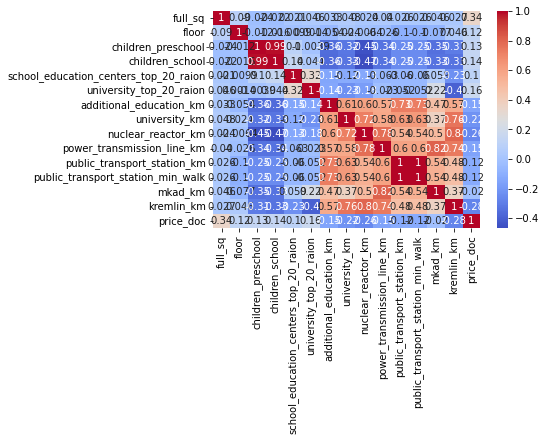

In [34]:
# для большей наглядности построим тепловую карту
sns.heatmap(dff[numeric_feature_columns].corr(), annot=True, cmap='coolwarm')

Если корреляция между признаками по модулю высокая, они будут "мешаться" друг другу при обучении линейной модели, потому что вносят похожую информацию. Из набора нескольких коррелирующих признаков следует оставлять один. Оставьте среди числовых признаков только те, которые слабо коррелируют между собой:

*Если мы возьмем в качестве порогового значения корреляции 0.9 и выше (т.к. от 0.9 до 1 -- сильная корреляция), то следует исключить во избежание мультиколлинеарности ``children_preschool`` или ``children_school`` (сorr = 0.987); ``public_transport_station_km`` или ``public_transport_station_min_walk`` (сorr = 1.0).*


In [35]:
# удалим признаки ``children_preschool``, ``public_transport_station_min_walk``
dff = dff.drop(['children_preschool', 'public_transport_station_min_walk'], axis=1)

Что сейчас мешает просто взять и запустить LinearRegression? Дело в том, что три колонки содержат не понятные компьютеру числа, а текстовые значения, а именно:

In [36]:
dff[nominal_feature_columns]

,sub_area,ecology
0,Bibirevo,good
1,Nagatinskij Zaton,excellent
2,Tekstil'shhiki,poor
3,Mitino,good
4,Basmannoe,excellent
...,...,...
30466,Otradnoe,good
30467,Tverskoe,poor
30468,Poselenie Vnukovskoe,no data
30469,Obruchevskoe,satisfactory


Есть два варианта действий:
- просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.)
- рассмотреть каждое значение как отдельный признак и создать в таблице новые колонки с названиями этих значений (dummy - переменные)

$1$й способ хорошо подойдёт для колонки `ecology`, а $2$й -- для районов.


In [37]:
# посмотрим на все значения признака `ecology`
dff['ecology'].unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [38]:
# удалим наблюдения cо значениями 'no data', т.к. это тоже пропуски
dff = dff[dff['ecology'] != 'no data']

In [39]:
# создадим словарь со значением для каждой категории
scale = {'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4}

In [40]:
# заменим через метод .replace()
dff['ecology'] = dff['ecology'].replace(scale)

# убедимся, что все признаки перекодированы
dff[nominal_feature_columns]

,sub_area,ecology
0,Bibirevo,3
1,Nagatinskij Zaton,4
2,Tekstil'shhiki,1
3,Mitino,3
4,Basmannoe,4
...,...,...
30465,Tverskoe,4
30466,Otradnoe,3
30467,Tverskoe,1
30469,Obruchevskoe,2


In [41]:
dff = pd.get_dummies(dff)

Решим задачу регрессии на полученных данных.

*Пусть целевой переменной будет цена квартиры - ``price_doc``. Построим линейную регрессию с целью оценить вклад каждого признака в объяснение изменчивости целевого признака.*

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# зададим целевую переменную и нецелевые признаки
X = dff.drop('price_doc', axis=1)
y = dff['price_doc']

In [44]:
# разделим выборку на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

# обучили на тренировочной выборке
model.fit(X_train, y_train)

# cделали прогнозы на тестовой
y_pred = model.predict(X_test)

In [45]:
# посчитаем R^2: cколько объясняет 
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.26345630078351656

In [46]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [47]:
# посчитаем среднеквадратическую ошибку
rmse(y_test, y_pred)

4479322.902993431

*R^2 = 0.263. Предложенная нами модель объясняет 26% разброса в исходных данных. Стоит заметить, что объяснительная сила модели -- маленькая. Более того, она ошибается в среднем на 4 млн при оценке стоимости квартир (на 4.479.322 рубля)*

In [48]:
# применим нормализацию к признакам
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_sc = scaler.transform(X_train) 
X_test_sc = scaler.transform(X_test)

In [49]:
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)

In [50]:
# посчитаем R^2 (2)
r2_score(y_test, y_pred)

0.2634786226670607

In [51]:
# посчитаем среднеквадратическую ошибку (2)
rmse(y_test, y_pred)

4479255.0267208675

In [52]:
# Как изменился R^2
print(0.2634786226670607 - 0.26345630078351656)

# Как изменился RMSE
print(4479255.0267208675 - 4479322.902993431)

2.232188354411857e-05
-67.87627256382257


*Качество модели стало чуть лучше: выше объяснительная сила; меньше среднекватрическая ошибка. Но прирост в качестве крайне незначительный.*

*Попробуем оценить **гребневую регрессию** (или ридж-регрессию), так как у нас много признаков (а это один из методов понижения размерности).*

In [53]:
from sklearn.linear_model import Ridge

In [54]:
# параметр alpha пусть будет 1 
ridge_model = Ridge(alpha=1.0)

# обучили на тренировочной выборке
ridge_model.fit(X_train, y_train)

# сделали прогнозы на тестовой
y_pred_ridge = ridge_model.predict(X_test)

In [55]:
r2_score(y_test, y_pred_ridge)

0.2646892617496225

In [56]:
rmse(y_test, y_pred_ridge)

4475572.179501968

In [57]:
# Как изменился R^2
print(0.2646892617496225 - 0.2634786226670607)

# Как изменился RMSE
print(4475572.179501968 - 4479255.0267208675)

0.001210639082561804
-3682.8472188990563


*Итак, по сравнению с моделью линейной регрессии (прежде всего, после нормализации) ридж-регрессия дает качество лучше: объяснительная сила выше на 0.001, а среднеквадратическая ошибка меньше на 3.682.*

*Время ансамблей!*


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

*Бэггинг: решающее дерево*

In [59]:
# создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth = 10, random_state = 42)

# обучаем модель
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

*Бэггинг: случайный лес*

In [60]:
# создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth = 10, n_estimators = 10, random_state = 42)

# обучаем модель
regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [61]:
import math

# формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# оцениваем качество по метрике RMSE
print(f'Качество предсказания по RMSE для решающего дерева {math.sqrt(round(mean_squared_error(y_test, y_pred1),2))}')
print(f'Качество предсказания по RMSE для случайного леса  {math.sqrt(round(mean_squared_error(y_test, y_pred2),2))}')

Качество предсказания по RMSE для решающего дерева 3695610.2062876597
Качество предсказания по RMSE для случайного леса  3469142.6881466145


*Стоит заметить, что БЭГГИНГ позволяет добиться значительного повышения качества модели. Интерпретируем для случайного леса (т.к. качество случайного леса выше одиночного решающего дерева): модель ошибается теперь не на 4 млн, а на 3 млн 469 тысяч и 142 рубля.*

*И последнее - СТЕКИНГ.*

In [62]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [63]:
# создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# создаем объект класса стекинг
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
# обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [64]:
# формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)

# оцениваем качество по метрике RMSE
print(f'Качество предсказания по MSE для стекинга {math.sqrt(round(mean_squared_error(y_test, y_pred_stack), 2))}')

Качество предсказания по MSE для стекинга 4158088.3290409558


*Можем подытожить. Бэггинг: случайный лес дает неплохое относительно других моделей качество, т.к. позволяет значительно уменьшить среднеквадратическую ошибку (RMSE) по сравнению с ридж-регрессией и стекингом (где соединили ридж-регрессию и решающее дерево). Кроме того, нормализация признаков позволяет чуть-чуть улучшить качество изначальной линейной модели.*